In [1]:
#import the data

from __future__ import print_function
import numpy as np
import mxnet as mx
import csv
import pandas as pd
from mxnet import nd, autograd, gluon
mx.random.seed(1)

from numpy import genfromtxt

train_data = genfromtxt('D:\\NEU Courses\\Predictive Anaytics\\Week2\MNIST-data\\mnist_train.csv', delimiter=',')
test_data= genfromtxt('D:\\NEU Courses\\Predictive Anaytics\\Week2\MNIST-data\\mnist_test.csv', delimiter=',')

#print(train_data)


In [2]:
print(train_data.shape)
print(test_data.shape)

(60001, 785)
(10000, 785)


In [3]:
data_cont = mx.cpu()
model_cont = mx.cpu()

In [4]:
#divide data into dependent and independent variables

train_pixel=[]
train_label=[]
test_pixel=[]
test_label=[]
j=0
for i in range(1,len(train_data)):
    train_pixel.append(train_data[i][1:])
    train_label.append(train_data[i][j])

for i in range(len(test_data)):
    test_pixel.append(test_data[i][1:])
    test_label.append(test_data[i][j])
    
train_pixel=np.array(train_pixel)
train_label=np.array(train_label)
test_pixel=np.array(test_pixel)
test_label=np.array(test_label)

In [5]:
type(train_pixel[0][0])

numpy.float64

In [6]:
print(train_pixel[0])
print(train_label[0])
print(test_pixel[0])
print(test_label[0])


[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [7]:
#transform pixel to make it in the range of 0 and 1

train_pixel=train_pixel/255
test_pixel=test_pixel/255

train_pixel

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
#display the image for train set
import numpy as np
import matplotlib.pyplot as plt

image=[]
plt.figure(figsize=(20,4))
for i in range(5):
    index=i
    image=(train_pixel[i])
    label=(train_label[i])
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

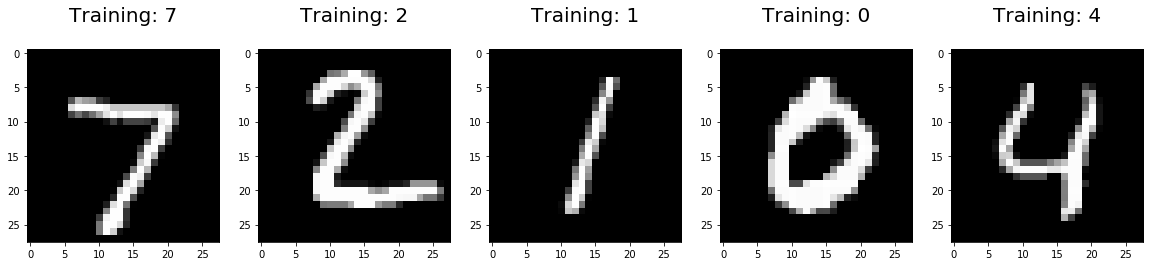

In [9]:
#display the image for test set
import numpy as np
import matplotlib.pyplot as plt

image=[]
plt.figure(figsize=(20,4))
for i in range(5):
    index=i
    image=(test_pixel[i])
    label=(test_label[i])
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [10]:
#transform numpy array to mxnet.ndarray


mx_train_pixel = mx.nd.array(train_pixel)
mx_train_label = mx.nd.array(train_label)
mx_test_pixel=mx.nd.array(test_pixel)
mx_test_label=mx.nd.array(test_label)

print((mx_train_pixel).shape)
print((mx_train_label).shape)
print((mx_test_pixel).shape)

(60000, 784)
(60000,)
(10000, 784)


In [11]:
col_inputs = 784
col_outputs = 10
train_examples = 60000

In [12]:
#flatten the data to a 1D vector of size 784 (28*28) for each class (10)
#create a 784*10 matrix, where a vector of size 784 consists of features for each class i.e. digits from 0-9

W = nd.random_normal(shape=(col_inputs, col_outputs),ctx=model_cont)
b = nd.random_normal(shape=col_outputs,ctx=model_cont)

params = [W, b]

print(params)

#attach a gradient to the above matrix. we expect to get a gradient while training our model
for param in params:
    param.attach_grad()

#print(param)

[
[[ 0.03629482 -0.49024424 -0.9501793  ...  1.040828   -0.45256865
   0.3116043 ]
 [-0.8367378  -0.7883006   0.1266448  ... -0.6883264   0.84155583
  -0.61584127]
 [ 0.01961146 -0.24421656 -0.13420728 ...  1.946873    0.45615166
  -1.080743  ]
 ...
 [ 0.5153039   0.35474932  0.6605761  ... -0.04661686 -0.44999275
  -1.18862   ]
 [-0.10230288  0.95049834 -0.34374905 ... -0.65199554 -0.29201967
   0.9243909 ]
 [ 1.1091387   0.30381504 -1.02926    ... -0.83146644  0.22943655
   1.3234767 ]]
<NDArray 784x10 @cpu(0)>, 
[ 0.7022475  -0.84411263 -0.5558737   0.09676385 -2.3329272   2.2572143
  0.03539884 -0.49671832  0.27115455 -1.4004679 ]
<NDArray 10 @cpu(0)>]


In [13]:
type(W)

mxnet.ndarray.ndarray.NDArray

In [14]:
#define softmax function to get the probability for each class (digit-0 to 9)
#softmax model can be used to assign probabilities to different objects

def softmax(y_linear):
    exp = nd.exp(y_linear-nd.max(y_linear, axis=1).reshape((-1,1)))
    norms = nd.sum(exp, axis=1).reshape((-1,1))
    return exp / norms


# #try a sample
# sample_y_linear = nd.random_normal(shape=(2,10))
# sample_ycap = softmax(sample_y_linear)
# print(sample_ycap)

# #check the sum of all probabilities - the sum of all probabilities should be 1

# print(nd.sum(sample_ycap, axis=1))

In [15]:
#define the model: SUM(W*x + b) and get ycap for each class

def model(X):
    y_linear = nd.dot(X, W) + b
    ycap = softmax(y_linear)
    return ycap

In [16]:
#define cross entropy function to compute the loss. It measures the performance of a classification model whose output is the probability distribution from 0 and 1
#the loss (Cross entropy increases with the decrease in the predicted probaility to the actual class (label))

def cross_entropy_loss(ycap, y):
    return - nd.sum(y * nd.log(ycap+1e-6))

In [17]:
#define SGD function to obtain the optimize value of the gradient (the degree of change in parameter with the amount of change in other features) 

def SGD_optimizer(params, lr):
    for param in params:
        param[:] = param - lr * param.grad

In [18]:
#check the accuracy of the model by calculating the correctly identified lables
def evaluate_performance(img_pixel,img_label, model):
    numerator = 0.
    denominator = 0.
    data = img_pixel.as_in_context(model_cont)
    label = img_label.as_in_context(model_cont)
    label_one_hot = nd.one_hot(label, 10)
    output = model(data)
    predictions = nd.argmax(output, axis=1)
    numerator += nd.sum(predictions == label)
    denominator += data.shape[0]
    return (numerator / denominator).asscalar()

In [19]:
evaluate_performance(mx_train_pixel,mx_train_label, model)



0.11845

In [22]:
#run the model on train dataset

epochs = 20
learning_rate = .010

for e in range(epochs):
    cumulative_loss = 0
    
    data = mx_train_pixel.as_in_context(model_cont)
    label = mx_train_label.as_in_context(model_cont)
    label_one_hot = nd.one_hot(label, 10)
    with autograd.record():
        output = model(data)
        loss = cross_entropy_loss(output, label_one_hot)
    loss.backward()
    SGD_optimizer(params, learning_rate)
    cumulative_loss += nd.sum(loss).asscalar()


    
    train_accuracy = evaluate_performance(mx_train_pixel,mx_train_label, model)
    print("Epoch %s. Loss: %s, Train_acc %s" % (e, cumulative_loss/train_examples, train_accuracy))
    #print("Train_acc %s" % (train_accuracy))

Epoch 0. Loss: 7.493392708333333, Train_acc 0.48126668
Epoch 1. Loss: 7.084291145833333, Train_acc 0.49078333
Epoch 2. Loss: 6.958383854166667, Train_acc 0.49773332
Epoch 3. Loss: 6.8591484375, Train_acc 0.5029167
Epoch 4. Loss: 6.787695833333333, Train_acc 0.48625
Epoch 5. Loss: 6.979265625, Train_acc 0.40341666
Epoch 6. Loss: 8.1173515625, Train_acc 0.43478334
Epoch 7. Loss: 7.741213020833333, Train_acc 0.44086668
Epoch 8. Loss: 7.659741666666666, Train_acc 0.42251667
Epoch 9. Loss: 7.898696875, Train_acc 0.42826667
Epoch 10. Loss: 7.8291348958333336, Train_acc 0.44096667
Epoch 11. Loss: 7.633975, Train_acc 0.49138334
Epoch 12. Loss: 6.9458390625, Train_acc 0.49355
Epoch 13. Loss: 6.9366703125, Train_acc 0.52865
Epoch 14. Loss: 6.439878645833334, Train_acc 0.53515
Epoch 15. Loss: 6.360834375, Train_acc 0.52421665
Epoch 16. Loss: 6.502603645833333, Train_acc 0.52533334
Epoch 17. Loss: 6.495361458333333, Train_acc 0.5251167
Epoch 18. Loss: 6.4893796875, Train_acc 0.53315
Epoch 19. Loss

In [23]:
# Define the function to do prediction
def model_predict(model,data):
    output = model(data)
    return nd.argmax(output, axis=1)

# use test data to predict the labels using trained model

y_test=[]
y_test.append(mx_test_label)
data = mx_test_pixel.as_in_context(model_cont)
#print(data.shape)
pred=model_predict(model,data)
test_accuracy = evaluate_performance(mx_test_pixel,mx_test_label, model)
print("Test accuracy %s" % (test_accuracy))
print('model predictions are:', pred)

data.shape

Test accuracy 0.5378
model predictions are: 
[4. 6. 1. ... 4. 8. 6.]
<NDArray 10000 @cpu(0)>


(10000, 784)

In [24]:
#convert NDArray to list type for computing the confusion matrix

# #type(y_test)

type(y_test[0])

#test=y_test[0].tolist()

test_numpy = (y_test[0].asnumpy())
test_label=(test_numpy.tolist())

type(test_label)
#print(y_test)

#print(test_label)
type(test_label[0])

type(pred)

pred_numpy=pred.asnumpy()
predictions=(pred_numpy.tolist())

type(predictions)
#print(predictions)

list

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# cm = metrics.confusion_matrix(test_label, predictions)
# print(cm)
# cm.shape

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true = test_label, y_pred = predictions)
print(cm)

[[ 959    0    0    0    1    0    4    0   16    0]
 [   0 1060    0    0    1    1    5    0   68    0]
 [ 117   40    0    0   73    2  255    0  545    0]
 [  51    8    0    0   11  413   18    0  509    0]
 [   5    8    0    0  943    2    9    0   15    0]
 [  37    8    0    0   29  614   31    0  173    0]
 [  29    3    0    0   12    8  887    0   19    0]
 [ 102   49    0    0  525    6    0    0  346    0]
 [  17    2    0    0   16    9   15    0  915    0]
 [  28   11    0    0  810   19    2    0  139    0]]


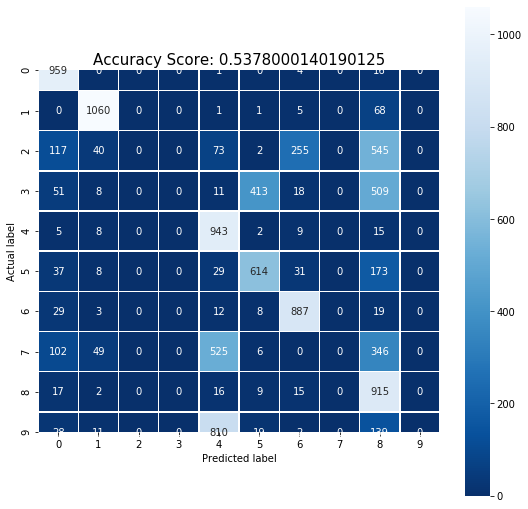

In [26]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(test_accuracy)
plt.title(all_sample_title, size = 15);